In [15]:
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
base = Path("/Users/larsankile/code/defi-measurement/data")

In [19]:
# Group by `address` and `block_number` and count the number of swaps
# but do it lazily
swap_counts = (
    pl.scan_parquet(base / "pool_swap_events/*.parquet").group_by(["address", "block_number"]).agg(swap_count=pl.len())
).collect()

In [21]:
swap_counts.sort("swap_count", descending=True)

address,block_number,swap_count
str,i64,u32
"""0x88e6a0c2ddd26feeb64f039a2c41…",18474075,230
"""0xb5f36b7e7313a969aa5014007fc9…",20055819,206
"""0xa42bfbf7c87207874ce975b59d42…",18622654,159
"""0x89872444a66ce6f85232cb3b6540…",20193897,135
"""0x6505215f0aa54ccef41b24ee62ea…",18551883,129
…,…,…
"""0x37a981532d7a2754ec53f9fd86fc…",18872797,1
"""0xeec08e6cab52e83aa3f6d3224c6d…",18668114,1
"""0xd34e4855146ac0c6d0e4a652bd5f…",13657944,1


[]

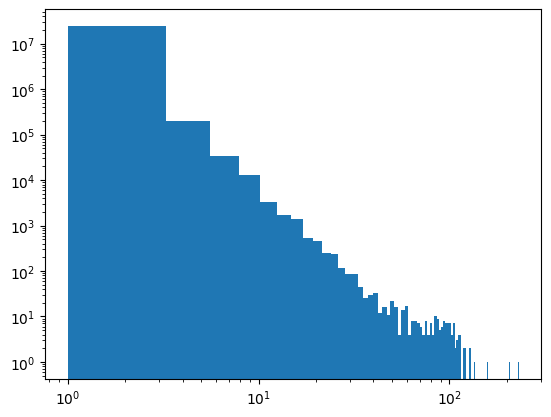

In [18]:
plt.hist(swap_counts.get_column("count").to_numpy(), bins=100)
plt.loglog()

In [22]:
# Write the result to a file
swap_counts.write_parquet(base / "swap_counts.parquet")